In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from biopsykit.utils.dataframe_handling import multi_xs
import optuna

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from fau_colors import register_cmaps

register_cmaps()

sns.set_theme(context="paper", style="white", palette="faculties", font_scale=1.2)

%matplotlib widget

In [4]:
def conf_matrix(confusion_matrix):
    x = confusion_matrix.sum(axis=1)[:, np.newaxis]
    confusion_matrix /= x
    confusion_matrix *= 100
    confusion_matrix = round(confusion_matrix, 2)
    return confusion_matrix

In [5]:
##### Fill in Algorithm here!! ####
algorithm = "xgb"
##### Fill in Algorithm here!! ####

In [6]:
path = Path.cwd().parents[1].joinpath("exports/results_per_algorithm/")
path = path.joinpath(algorithm)
db_path = path.joinpath("db")

# 5 Stage
# Acc only

In [7]:
stage = "5stage"
mod = "acc"

In [8]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [9]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [10]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.548501    0.099967
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.461102    0.101490
getup_latency             10.986607   26.978896
kappa                      0.274916    0.129782
mcc                        0.329844    0.137131
net_sleep_duration       734.491071  187.741163
precision                  0.435496    0.104972
recall                     0.548501    0.099967
sleep_efficiency          74.863983   15.815083
sleep_onset              113.790179   84.686791
sleep_onset_latency       46.455357   59.995200
specificity                0.839361    0.071786
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   177.513393  138.667004
wake_onset              1038.633929  149.108471

In [11]:
confusion_matrix_acc = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc

,wake,n1,n2,n3,rem
wake,54655.0,0.0,26202.0,0.0,2.0
n1,6686.0,0.0,16415.0,0.0,1.0
n2,12453.0,0.0,80609.0,0.0,21.0
n3,851.0,0.0,16233.0,0.0,0.0
rem,2532.0,0.0,29288.0,0.0,0.0


# 5 Stage
# Acc + HRV

In [12]:
stage = "5stage"
mod = "acc_hrv"

In [13]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [14]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [15]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.563798    0.096515
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.487861    0.099588
getup_latency             10.022321   26.414163
kappa                      0.311018    0.122269
mcc                        0.358168    0.122969
net_sleep_duration       710.593750  194.382846
precision                  0.531134    0.105008
recall                     0.563798    0.096515
sleep_efficiency          72.414597   16.737693
sleep_onset              113.473214   86.119477
sleep_onset_latency       46.138393   61.337437
specificity                0.846502    0.064723
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   200.973214  145.527398
wake_onset              1039.598214  148.908944

In [16]:
confusion_matrix_acc_hrv = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv

,wake,n1,n2,n3,rem
wake,57999.0,156.0,21722.0,12.0,970.0
n1,7467.0,222.0,14724.0,7.0,682.0
n2,12810.0,146.0,78262.0,94.0,1771.0
n3,924.0,9.0,15750.0,115.0,286.0
rem,3601.0,133.0,25553.0,93.0,2440.0


# 5 Stage
# ACC + HRV + RRV

In [17]:
stage = "5stage"
mod = "acc_hrv_RRV"

In [18]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [19]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [20]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.616628    0.100890
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.565570    0.106796
getup_latency             10.816964   29.201595
kappa                      0.417129    0.129896
mcc                        0.447657    0.125567
net_sleep_duration       701.901786  193.426964
precision                  0.598718    0.094062
recall                     0.616628    0.100890
sleep_efficiency          71.687640   17.214833
sleep_onset              110.285714   86.419192
sleep_onset_latency       42.950893   61.765957
specificity                0.861628    0.062143
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   211.455357  154.576081
wake_onset              1038.803571  148.358694

In [21]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv_rrv

,wake,n1,n2,n3,rem
wake,61718.0,411.0,14982.0,24.0,3724.0
n1,8045.0,531.0,11434.0,20.0,3072.0
n2,11203.0,377.0,73655.0,984.0,6864.0
n3,616.0,10.0,15187.0,604.0,667.0
rem,3726.0,258.0,12366.0,41.0,15429.0


# 5 Stage
# ACC + HRV + EDR

In [22]:
stage = "5stage"
mod = "acc_hrv_EDR"

In [23]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [24]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [25]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.576362    0.099602
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.509429    0.106205
getup_latency              8.495536   21.630612
kappa                      0.337831    0.128795
mcc                        0.379111    0.127089
net_sleep_duration       707.468750  200.158007
precision                  0.545077    0.109560
recall                     0.576362    0.099602
sleep_efficiency          72.153181   17.483987
sleep_onset              114.825893   89.576337
sleep_onset_latency       47.491071   66.319514
specificity                0.849746    0.062491
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   203.754464  157.002978
wake_onset              1041.125000  148.769399

In [26]:
confusion_matrix_acc_hrv_edr = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv_edr

,wake,n1,n2,n3,rem
wake,58881.0,206.0,20033.0,8.0,1731.0
n1,7568.0,241.0,13681.0,2.0,1610.0
n2,12576.0,160.0,76629.0,282.0,3436.0
n3,931.0,3.0,15272.0,269.0,609.0
rem,3750.0,121.0,21781.0,40.0,6128.0


/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96

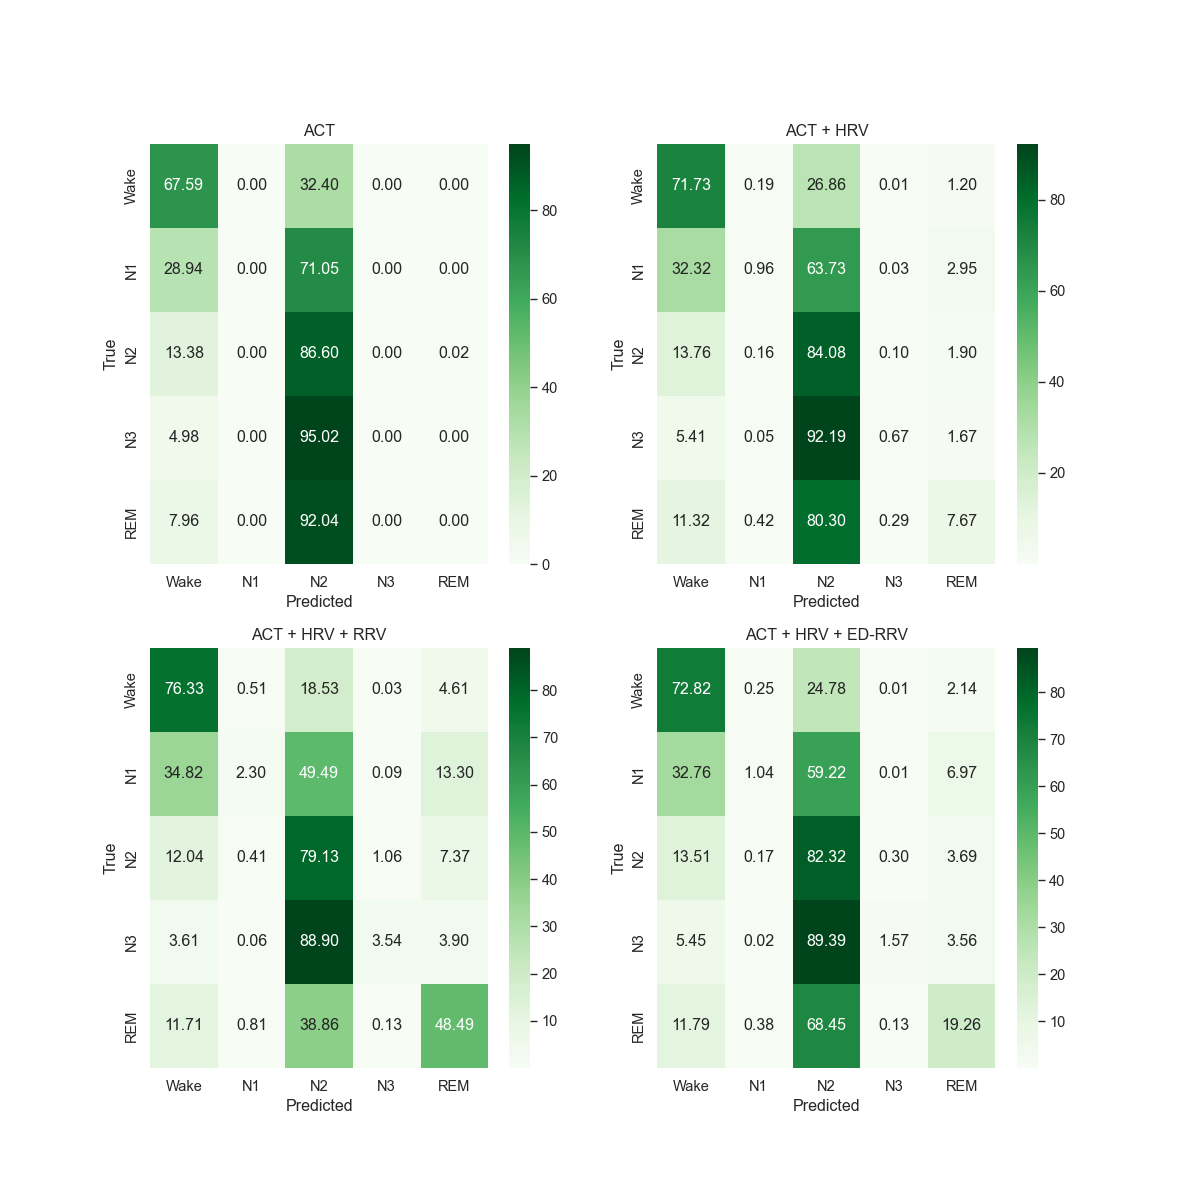

In [27]:

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[0, 0],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[0, 1],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv_rrv.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[1, 0],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv_edr.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[1, 1],
    cmap="Greens",
)
axs[0, 0].set_title("ACT")
axs[0, 0].set_ylabel("True")
axs[0, 0].set_xlabel("Predicted")

axs[0, 1].set_title("ACT + HRV")
axs[0, 1].set_ylabel("True")
axs[0, 1].set_xlabel("Predicted")

axs[1, 0].set_title("ACT + HRV + RRV")
axs[1, 0].set_ylabel("True")
axs[1, 0].set_xlabel("Predicted")

axs[1, 1].set_title("ACT + HRV + ED-RRV")
axs[1, 1].set_ylabel("True")
axs[1, 1].set_xlabel("Predicted")
plt.savefig("confusionmatrix_" + algorithm + "_" + stage + ".pdf", format="pdf", bbox_inches="tight")

### Params

In [28]:
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[
#        0
#    ].best_trial.params
#)
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[
#        0
#    ].best_trial.params
#)
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[
#        0
#    ].best_trial.params
#)
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[
#        0
#    ].best_trial.params
#)

# 3 Stage
# Acc

In [29]:
stage = "3stage"
mod = "acc"

In [30]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [31]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [32]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.686297    0.093672
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.630791    0.097444
getup_latency              9.491071   25.855062
kappa                      0.367556    0.167385
mcc                        0.418522    0.166486
net_sleep_duration       793.852679  177.841292
precision                  0.630375    0.088161
recall                     0.686297    0.093672
sleep_efficiency          80.925542   14.016361
sleep_onset              107.696429   83.174121
sleep_onset_latency       40.361607   55.968589
specificity                0.810873    0.111064
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   127.955357  122.580102
wake_onset              1040.129464  148.755182

In [33]:
confusion_matrix_acc = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc

,wake,nrem,rem
wake,48641.0,32218.0,0.0
nrem,12838.0,120425.0,6.0
rem,1293.0,30527.0,0.0


# 3 Stage
# Acc + HRV

In [34]:
stage = "3stage"
mod = "acc_hrv"

In [35]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [36]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [37]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.697287    0.091240
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.648880    0.095778
getup_latency              7.799107   23.391766
kappa                      0.402769    0.157036
mcc                        0.447055    0.150248
net_sleep_duration       768.196429  180.133027
precision                  0.693910    0.089512
recall                     0.697287    0.091240
sleep_efficiency          78.340955   14.692925
sleep_onset              102.727679   80.480853
sleep_onset_latency       35.392857   48.849886
specificity                0.814338    0.098006
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   156.008929  133.460933
wake_onset              1041.821429  147.806607

In [38]:
confusion_matrix_acc_hrv = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv

,wake,nrem,rem
wake,52525.0,27994.0,340.0
nrem,14243.0,118228.0,798.0
rem,2129.0,28690.0,1001.0


# 3 Stage
# Acc + HRV + RRV

In [39]:
stage = "3stage"
mod = "acc_hrv_RRV"

In [40]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [41]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [42]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.740160    0.094904
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.724424    0.098396
getup_latency              7.330357   22.070571
kappa                      0.520838    0.153163
mcc                        0.545923    0.142535
net_sleep_duration       752.714286  181.061515
precision                  0.768144    0.071203
recall                     0.740160    0.094904
sleep_efficiency          76.876657   15.368325
sleep_onset              105.500000   84.876434
sleep_onset_latency       38.165179   58.171113
specificity                0.826096    0.087289
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   168.995536  140.335201
wake_onset              1042.290179  148.452649

In [43]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv_rrv

,wake,nrem,rem
wake,57039.0,21372.0,2448.0
nrem,13705.0,112970.0,6594.0
rem,2386.0,17201.0,12233.0


# 3 Stage
# Acc + HRV + EDR

In [44]:
stage = "3stage"
mod = "acc_hrv_EDR"

In [45]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [46]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [47]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.706040    0.093162
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.669445    0.099935
getup_latency              6.964286   21.040609
kappa                      0.432658    0.156237
mcc                        0.470324    0.147290
net_sleep_duration       762.745536  187.515650
precision                  0.718279    0.088445
recall                     0.706040    0.093162
sleep_efficiency          77.802072   15.605122
sleep_onset              105.928571   83.298126
sleep_onset_latency       38.593750   54.336521
specificity                0.814458    0.091581
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   160.294643  143.333356
wake_onset              1042.656250  148.581613

In [48]:
confusion_matrix_acc_hrv_edr = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv_edr

,wake,nrem,rem
wake,53815.0,26153.0,891.0
nrem,14317.0,115942.0,3010.0
rem,2376.0,25203.0,4241.0


In [49]:
sns.set_theme(context="talk", style="white", palette="faculties", font_scale=1.2)

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96

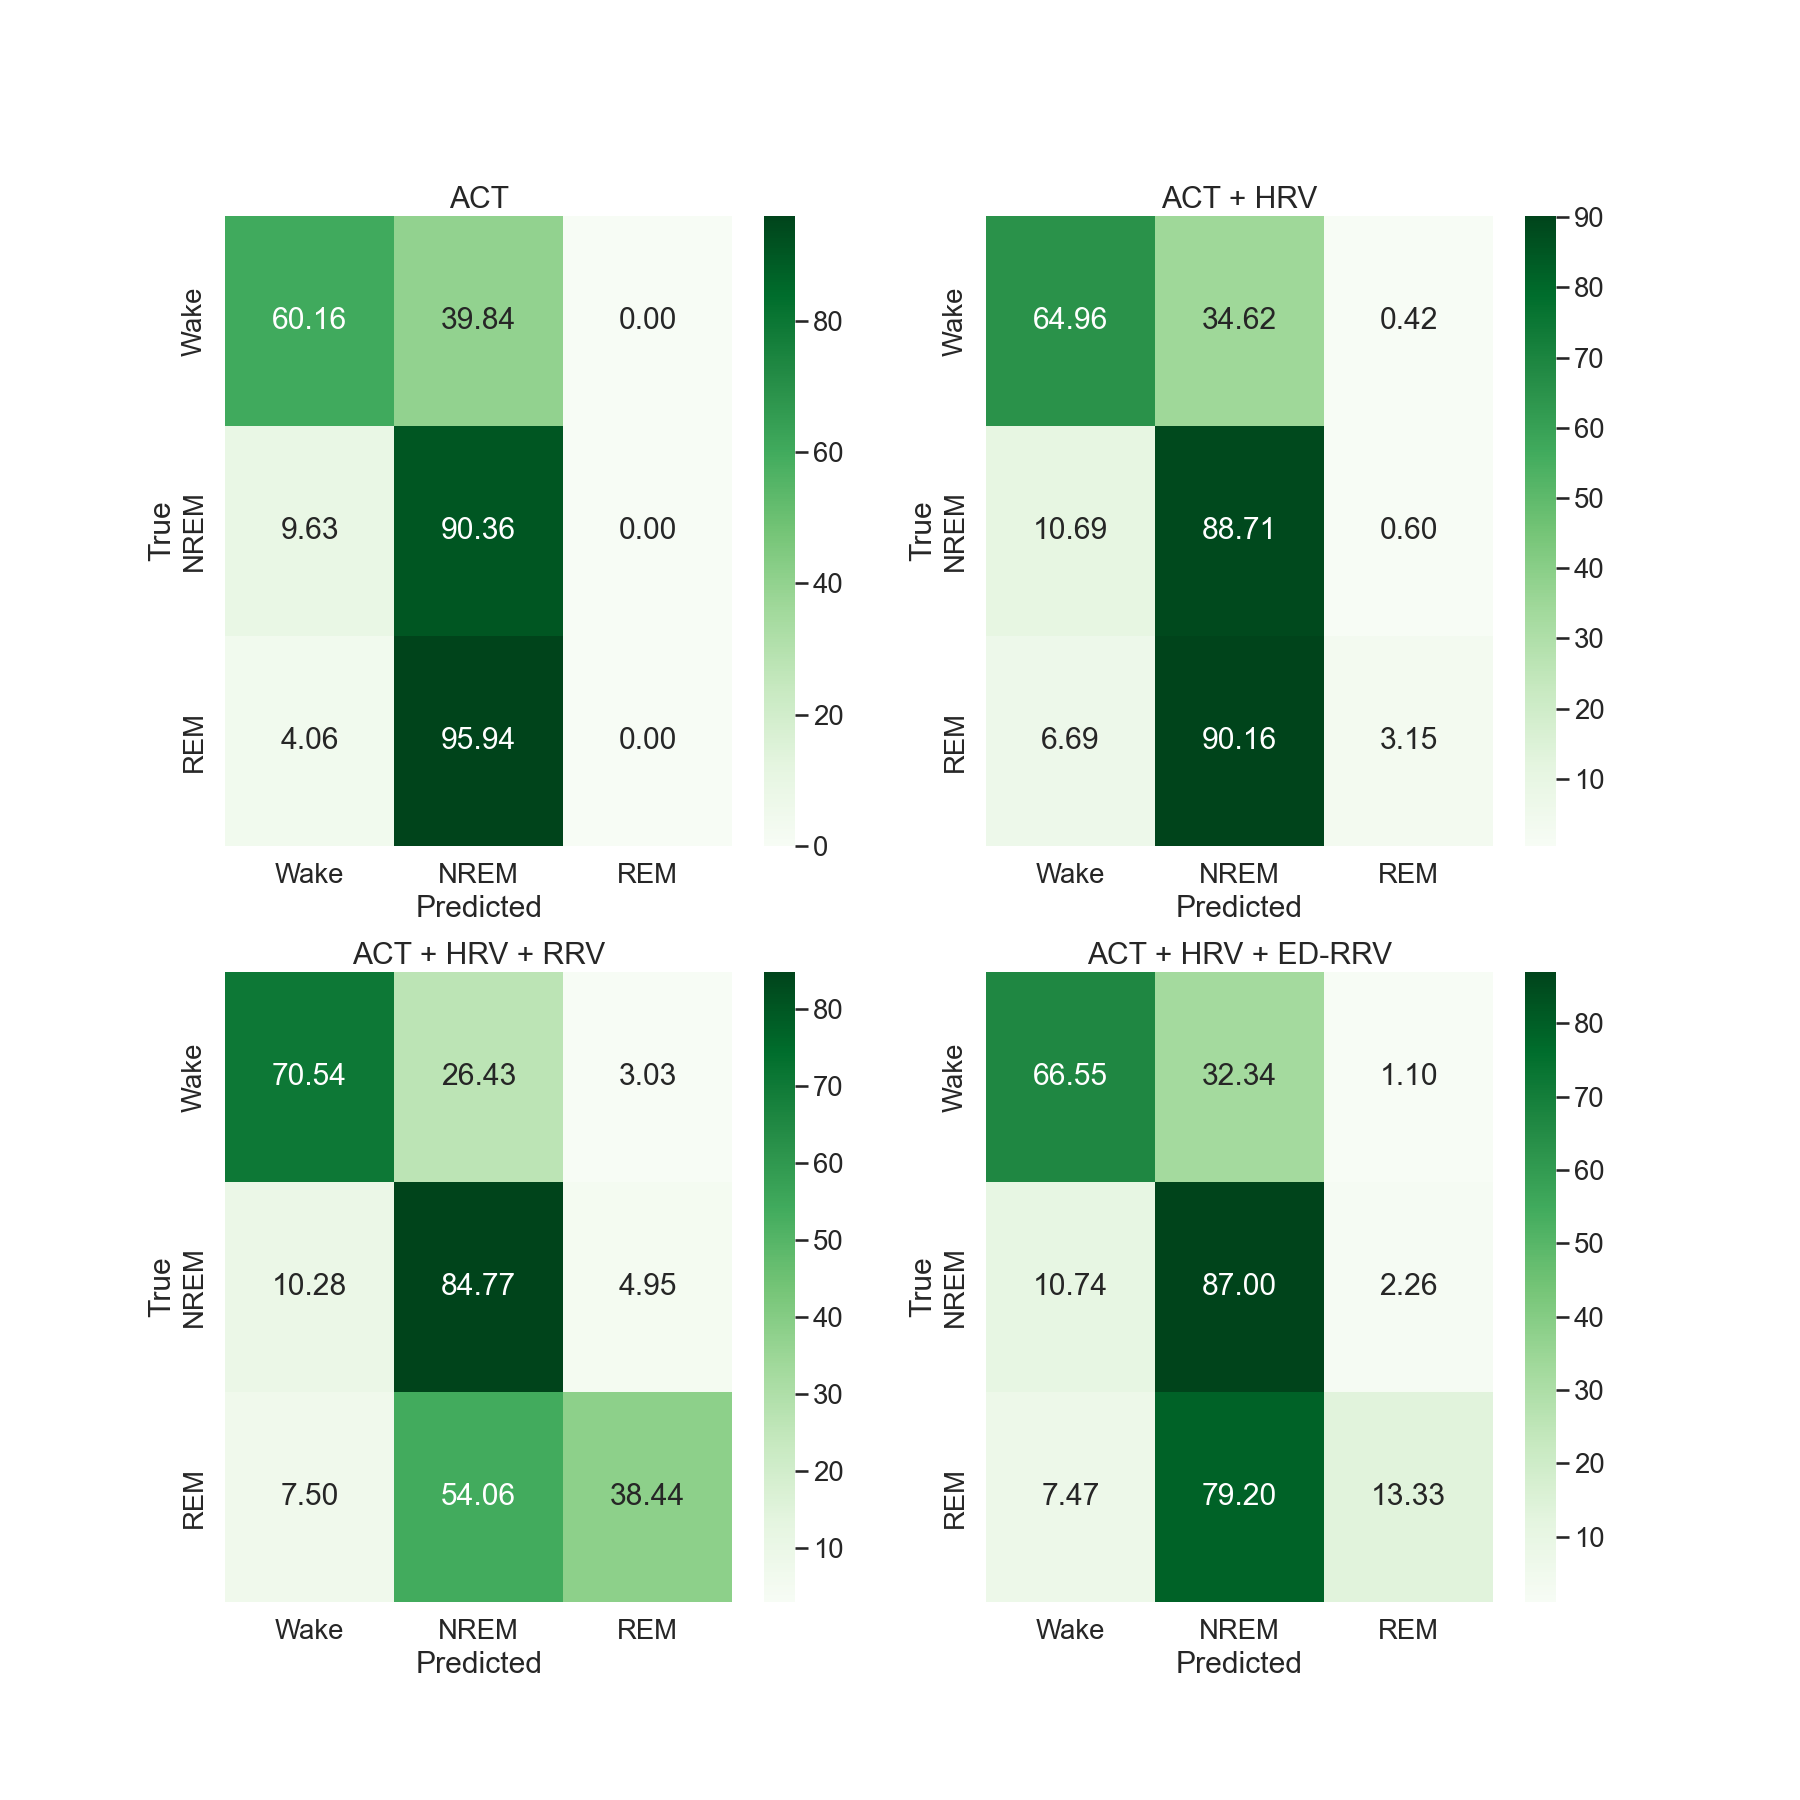

In [50]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 18))
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"}, index={"wake": "Wake", "nrem": "NREM", "rem": "REM"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[0, 0],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"}, index={"wake": "Wake", "nrem": "NREM", "rem": "REM"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[0, 1],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv_rrv.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"}, index={"wake": "Wake", "nrem": "NREM", "rem": "REM"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[1, 0],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv_edr.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"}, index={"wake": "Wake", "nrem": "NREM", "rem": "REM"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[1, 1],
    cmap="Greens",
)
axs[0, 0].set_title("ACT")
axs[0, 0].set_ylabel("True")
axs[0, 0].set_xlabel("Predicted")

axs[0, 1].set_title("ACT + HRV")
axs[0, 1].set_ylabel("True")
axs[0, 1].set_xlabel("Predicted")

axs[1, 0].set_title("ACT + HRV + RRV")
axs[1, 0].set_ylabel("True")
axs[1, 0].set_xlabel("Predicted")

axs[1, 1].set_title("ACT + HRV + ED-RRV")
axs[1, 1].set_ylabel("True")
axs[1, 1].set_xlabel("Predicted")

plt.savefig("confusionmatrix_" + algorithm + "_" + stage + ".pdf", format="pdf", bbox_inches="tight")

### Params

In [51]:
#y(
#tuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[
#  0
#best_trial.params
#
#y(
#tuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[
#  0
#best_trial.params
#
#y(
#tuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[
#  0
#best_trial.params
#
#y(
#tuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[
#  0
#best_trial.params
#

# Binary
# Acc only

In [52]:
stage = "binary"
mod = "acc"

In [53]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [54]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [55]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.811187    0.105938
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.858664    0.097044
getup_latency              8.750000   22.755278
kappa                      0.522626    0.223207
mcc                        0.551415    0.212538
net_sleep_duration       804.486607  173.897191
precision                  0.819696    0.114414
recall                     0.917053    0.111863
sleep_efficiency          82.014579   13.393502
sleep_onset              106.058036   82.772481
sleep_onset_latency       38.723214   54.835050
specificity                0.578906    0.212260
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   120.071429  116.846587
wake_onset              1040.870536  148.718762

In [56]:
confusion_matrix_acc = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc

,wake,sleep
wake,47286.0,33573.0
sleep,12763.0,152326.0


# Binary
# Acc + HRV

In [57]:
stage = "binary"
mod = "acc_hrv"

In [58]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [59]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [60]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.819750    0.102374
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.863191    0.095463
getup_latency              6.812500   20.545926
kappa                      0.553997    0.207638
mcc                        0.581376    0.193429
net_sleep_duration       787.964286  174.649755
precision                  0.833760    0.115229
recall                     0.911998    0.113990
sleep_efficiency          80.345224   13.791714
sleep_onset              101.334821   80.534645
sleep_onset_latency       34.000000   49.008556
specificity                0.623387    0.210710
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   139.464286  125.384820
wake_onset              1042.808036  147.889529

In [61]:
confusion_matrix_acc_hrv = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv

,wake,sleep
wake,50362.0,30497.0
sleep,13721.0,151368.0


# Binary
# Acc + HRV + RRV

In [62]:
stage = "binary"
mod = "acc_hrv_RRV"

In [63]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [64]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [65]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.840560    0.095548
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.876545    0.095634
getup_latency              6.593750   19.311934
kappa                      0.609905    0.188227
mcc                        0.633984    0.170420
net_sleep_duration       775.602679  174.632730
precision                  0.853914    0.107162
recall                     0.917496    0.116687
sleep_efficiency          79.189808   14.345792
sleep_onset              104.183036   83.304011
sleep_onset_latency       36.848214   56.851661
specifity                  0.676789    0.194965
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   148.272321  128.346301
wake_onset              1043.026786  148.426362

In [66]:
confusion_matrix_acc_hrv_rrv = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv_rrv

,wake,sleep
wake,54718.0,26141.0
sleep,12962.0,152127.0


### Params

# Binary
# Acc + HRV + EDR

In [67]:
stage = "binary"
mod = "acc_hrv_EDR"

In [68]:
full_results = pd.read_csv(path.joinpath(algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="metric")
full_results.columns.name = "subject"
results = full_results.drop(index="confusion_matrix")

In [69]:
results = pd.DataFrame(results.stack("subject"), columns=["data"]).astype("float")

In [70]:
results.groupby("metric").agg(["mean", "std"])

data            
                               mean         std
metric                                         
accuracy                   0.824385    0.099671
bed_interval_end        1049.620536  148.279048
bed_interval_start        67.334821   70.022350
f1                         0.866229    0.094623
getup_latency              6.151786   19.564180
kappa                      0.563794    0.201917
mcc                        0.592493    0.185379
net_sleep_duration       785.968750  180.298666
precision                  0.839550    0.111190
recall                     0.913600    0.117407
sleep_efficiency          80.167251   14.528619
sleep_onset              105.964286   83.283720
sleep_onset_latency       38.629464   55.266588
specifity                  0.632061    0.214967
total_sleep_duration     983.285714  152.957389
wake_after_sleep_onset   138.843750  132.620087
wake_onset              1043.468750  148.498158

In [71]:
confusion_matrix_acc_hrv_edr = pd.read_csv(
    path.joinpath("confusion_matrix_" + algorithm + "_benchmark_" + mod + "_" + stage + ".csv"), index_col="Unnamed: 0"
)
confusion_matrix_acc_hrv_edr

,wake,sleep
wake,51328.0,29531.0
sleep,13501.0,151588.0


In [72]:
sns.set_theme(context="poster", style="white", palette="faculties", font_scale=1.2)

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96734/420305049.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = confusion_matrix.sum(axis=1)[:, np.newaxis]
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_96

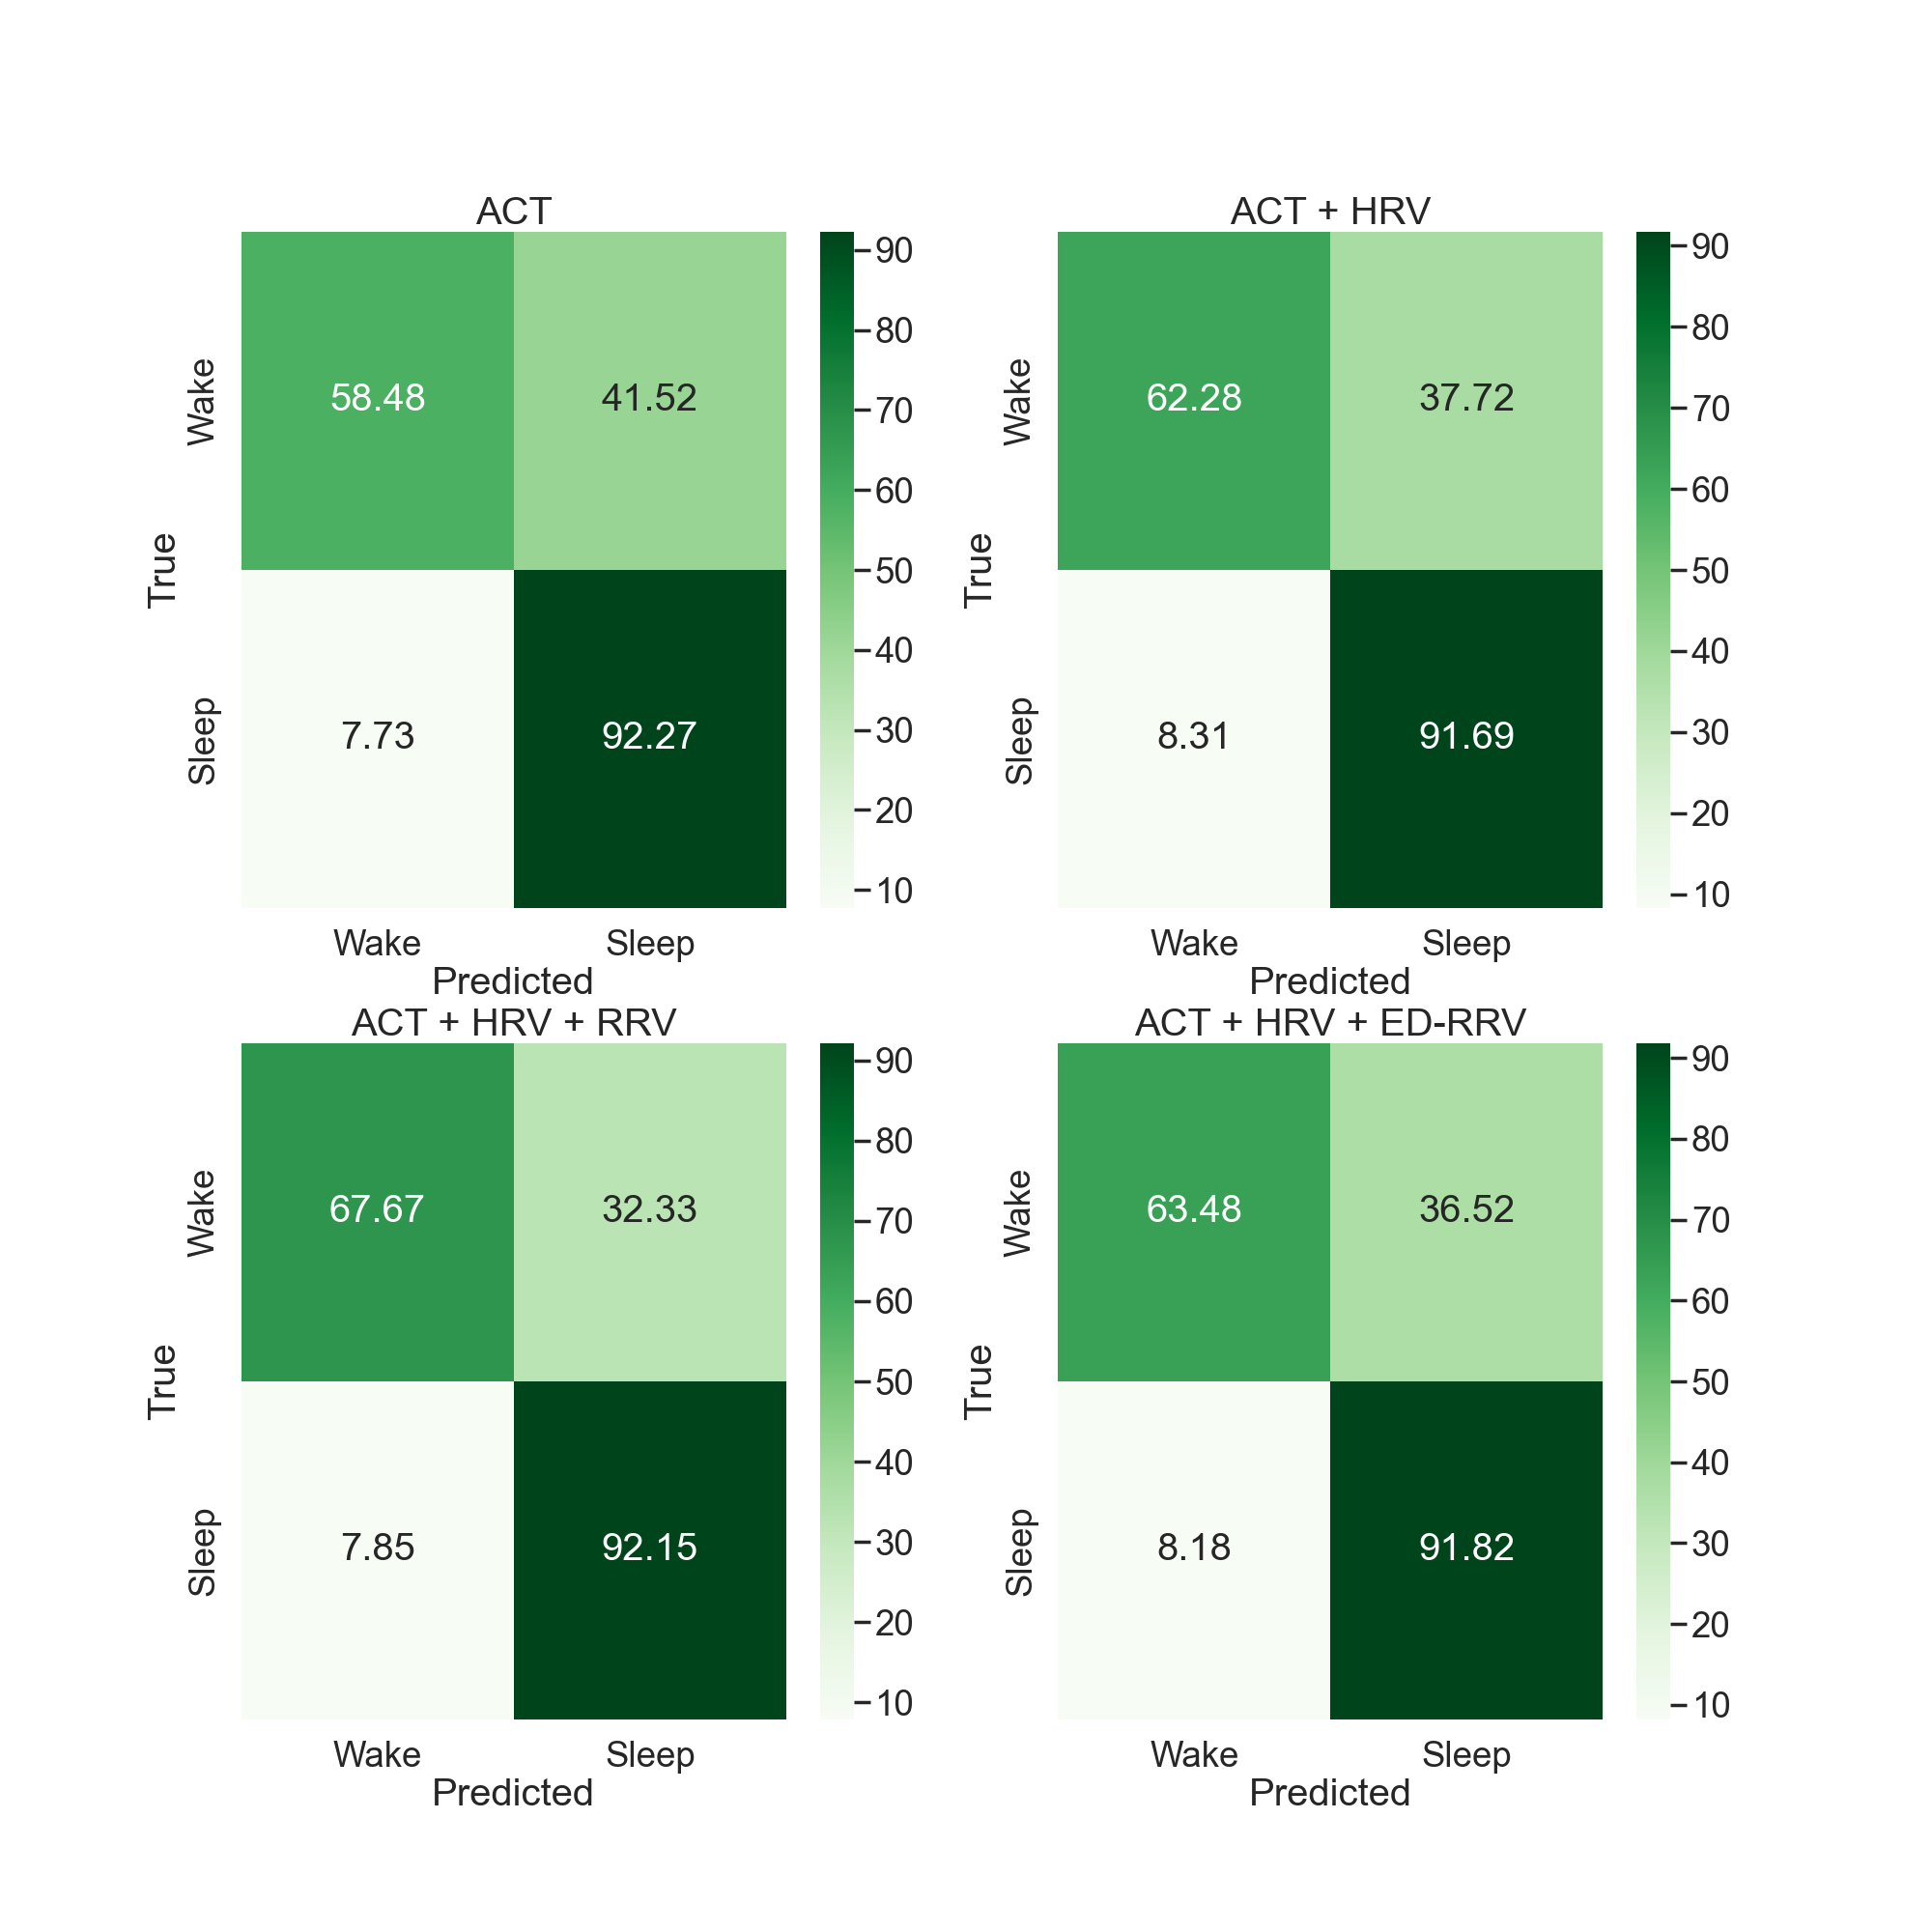

In [73]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))

sns.heatmap(
    conf_matrix(
        confusion_matrix_acc.rename(
            columns={"wake": "Wake", "sleep": "Sleep"}, index={"wake": "Wake", "sleep": "Sleep"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[0, 0],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv.rename(
            columns={"wake": "Wake", "sleep": "Sleep"}, index={"wake": "Wake", "sleep": "Sleep"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[0, 1],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv_rrv.rename(
            columns={"wake": "Wake", "sleep": "Sleep"}, index={"wake": "Wake", "sleep": "Sleep"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[1, 0],
    cmap="Greens",
)
sns.heatmap(
    conf_matrix(
        confusion_matrix_acc_hrv_edr.rename(
            columns={"wake": "Wake", "sleep": "Sleep"}, index={"wake": "Wake", "sleep": "Sleep"}
        )
    ),
    fmt=",.2f",
    annot=True,
    ax=axs[1, 1],
    cmap="Greens",
)
axs[0, 0].set_title("ACT")
axs[0, 0].set_ylabel("True")
axs[0, 0].set_xlabel("Predicted")

axs[0, 1].set_title("ACT + HRV")
axs[0, 1].set_ylabel("True")
axs[0, 1].set_xlabel("Predicted")

axs[1, 0].set_title("ACT + HRV + RRV")
axs[1, 0].set_ylabel("True")
axs[1, 0].set_xlabel("Predicted")

axs[1, 1].set_title("ACT + HRV + ED-RRV")
axs[1, 1].set_ylabel("True")
axs[1, 1].set_xlabel("Predicted")

plt.savefig("confusionmatrix_" + algorithm + "_" + stage + ".pdf", format="pdf", bbox_inches="tight")

In [74]:
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_" + stage + ".db")[
#        0
#    ].best_trial.params
#)
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_" + stage + ".db")[
#        0
#    ].best_trial.params
#)
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_RRV_" + stage + ".db")[
#        0
#    ].best_trial.params
#)
#display(
#    optuna.get_all_study_summaries("sqlite:///" + str(db_path) + "/" + algorithm + "_acc_hrv_EDR_" + stage + ".db")[
#        0
#    ].best_trial.params
#)